# Load data

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [76]:
df = pd.read_csv('spam.csv', encoding="latin-1")

In [77]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1051,ham,Do u noe wat time e place dat sells 4d closes?,NaN,NaN,NaN
1226,spam,Reply with your name and address and YOU WILL ...,NaN,NaN,NaN
1162,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [78]:

df.shape

(5572, 5)

## Steps in building Machine Learning algorithm
1. Data cleaning.
2. EDA.
3. Text Preprocessing.
4. Model building.
5. Evaluation.
6. Improvement.
7. Website. (optional)
8. Deploy. (optional)

## Data cleaning

In [79]:
df.shape

(5572, 5)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True);

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [83]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [85]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [87]:
# check for duplicate values

df.duplicated().sum() 

np.int64(403)

In [88]:
# remove duplicates

df.drop_duplicates(keep='first', inplace=True)

In [89]:
df.duplicated().sum()

np.int64(0)

## EDA

In [90]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

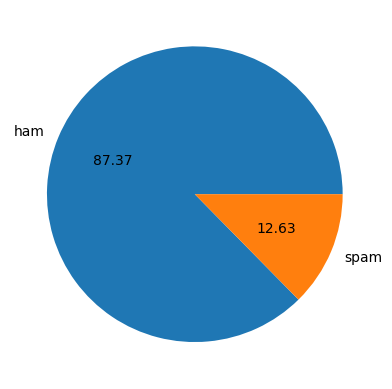

In [91]:
plt.pie( df['target'].value_counts(), labels=["ham", "spam"], autopct="%0.2f");
plt.show()

> Calculate the number of characters, number of words and number of sentences in dataset

In [92]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Muhammad Abu
[nltk_data]     Bakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Muhammad Abu
[nltk_data]     Bakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [93]:
# number of characters

df['num_characters'] = df['text'].apply(len);

In [94]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [95]:
# Total number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [96]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [97]:
# Total number of sentence

df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [99]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [100]:
# ham

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# spam

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: title={'center': 'Number of characters'}, xlabel='num_characters', ylabel='Count'>

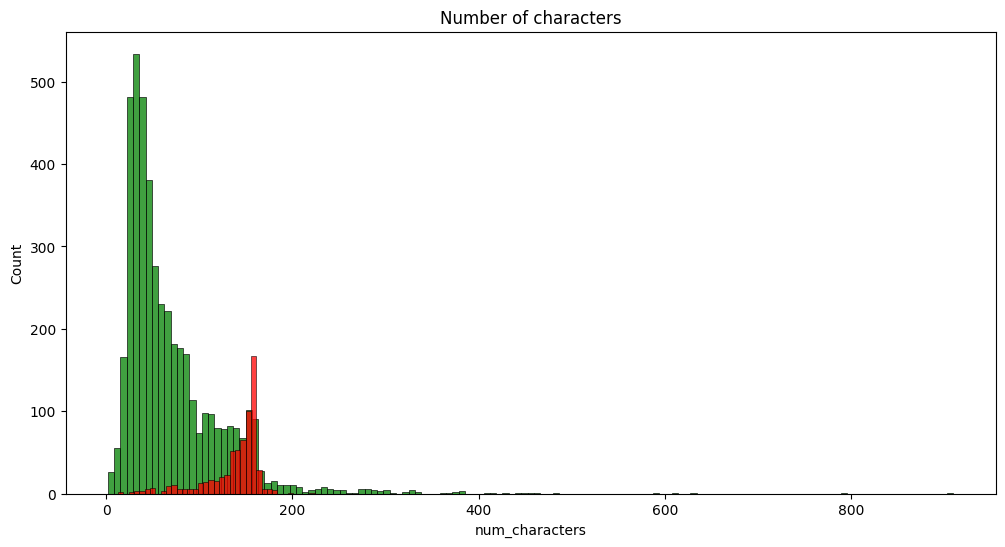

In [102]:
plt.figure(figsize=(12, 6))
plt.title("Number of characters")
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: title={'center': 'Number of words'}, xlabel='num_words', ylabel='Count'>

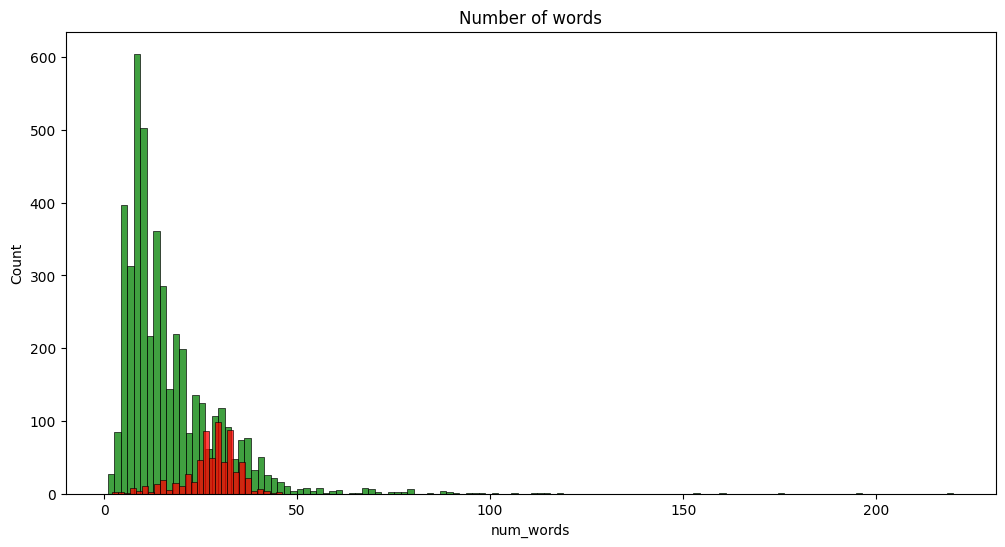

In [103]:
plt.figure(figsize=(12, 6))
plt.title("Number of words")
sns.histplot(df[df['target'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: title={'center': 'Number of sentences'}, xlabel='num_sentence', ylabel='Count'>

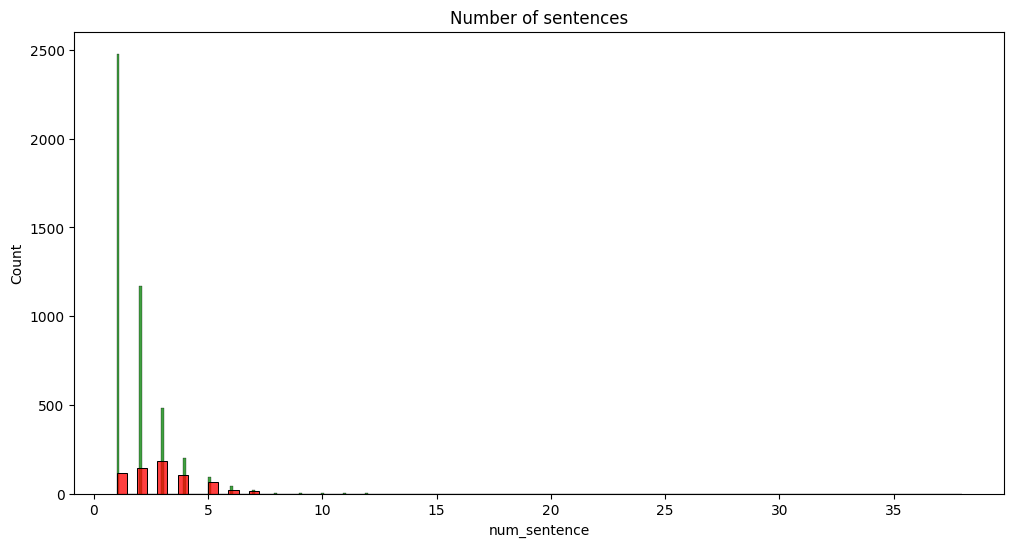

In [104]:
plt.figure(figsize=(12, 6))
plt.title("Number of sentences")
sns.histplot(df[df['target'] == 0]['num_sentence'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_sentence'], color = 'red')

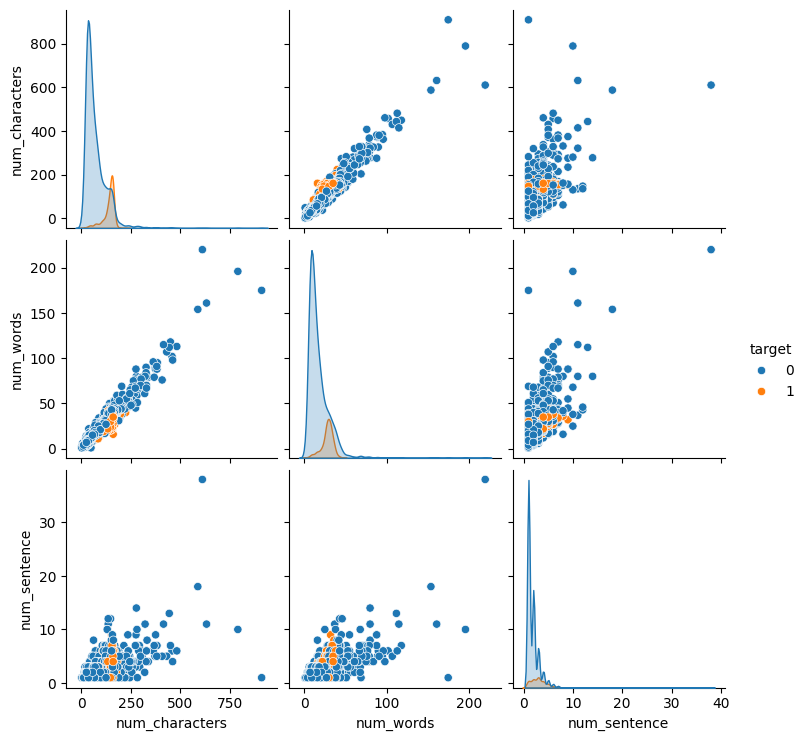

In [105]:
sns.pairplot(df,hue='target')

<Axes: >

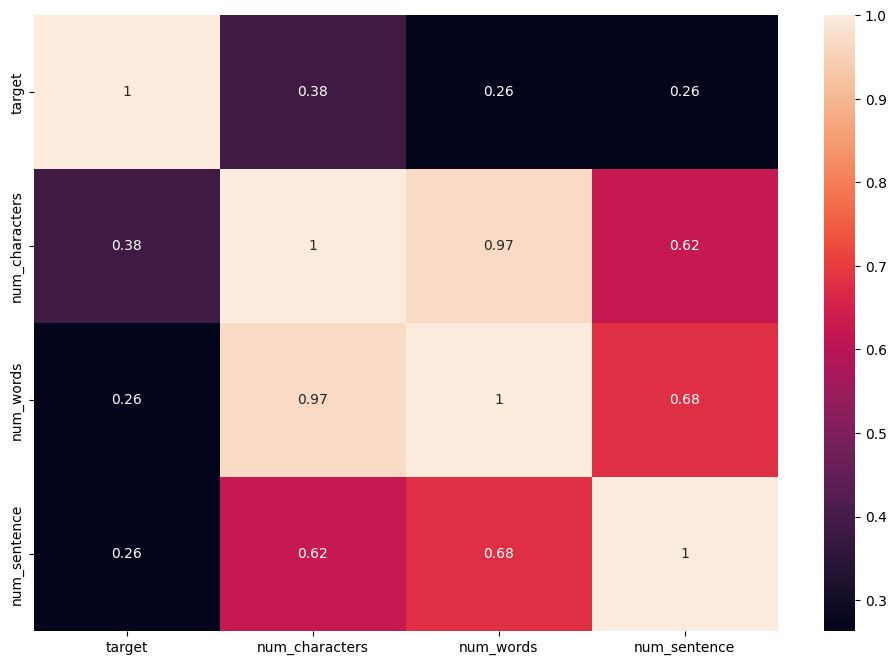

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)

## Data preprocessing (text in my case)

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [107]:
def toLowerCase(text):

    text = text.lower()
    return text

In [108]:
def tokenization(text):

    text = nltk.word_tokenize(text)
    return text

In [109]:
def removeSpecialCharacters(text):

    new_text = []
    for i in text:
        if i.isalnum():
            new_text.append(i)
    
    return new_text

In [110]:
def removeStopWordsAndPunctuation(text):
    
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [111]:
def stemming(text):

    ps = PorterStemmer()
    y = []

    for i in text:
        y.append(ps.stem(i))

    return y

In [112]:
def transformText(text):

    text = toLowerCase(text)
    text = tokenization(text)
    text = removeSpecialCharacters(text)
    text = removeStopWordsAndPunctuation(text)
    text = stemming(text)

    return text

In [113]:
df['transformed_text'] = df['text'].apply(transformText)

In [114]:
df.sample(5)

,target,text,num_characters,num_words,num_sentence,transformed_text
4261,0,You'll never believe this but i have actually ...,69,15,2,"[never, believ, actual, got, taunton, wow]"
957,0,Welp apparently he retired,26,4,1,"[welp, appar, retir]"
1076,0,Where can download clear movies. Dvd copies.,44,9,2,"[download, clear, movi, dvd, copi]"
1423,0,Lol great now im getting hungry.,32,7,1,"[lol, great, im, get, hungri]"
2660,0,Want to finally have lunch today?,33,7,1,"[want, final, lunch, today]"


In [115]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [116]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))

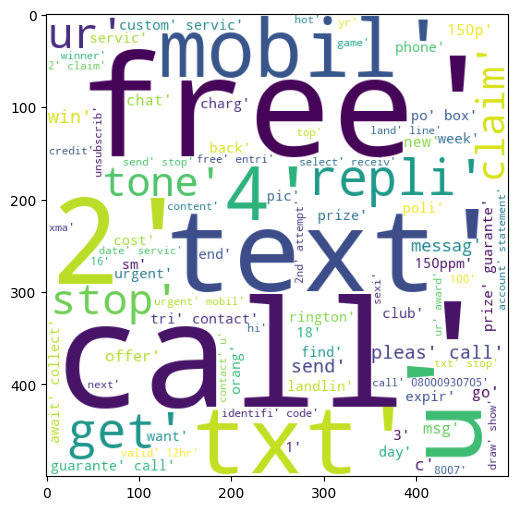

In [117]:
plt.figure(figsize=(6, 6))
plt.imshow(spam_wc)

In [118]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" "))

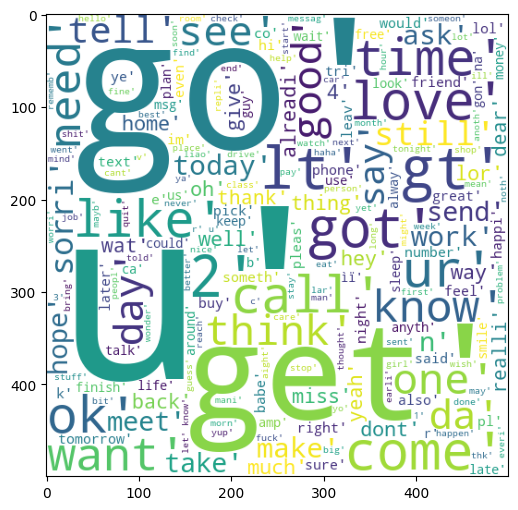

In [119]:
plt.figure(figsize=(6, 6))
plt.imshow(ham_wc)

In [120]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

C:\Users\Muhammad Abu Bakar\AppData\Local\Temp\ipykernel_29228\2740047552.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='viridis')


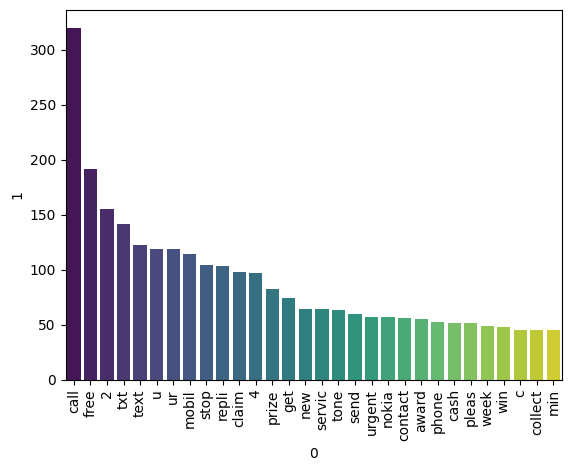

In [121]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [122]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

C:\Users\Muhammad Abu Bakar\AppData\Local\Temp\ipykernel_29228\1705057454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='viridis')


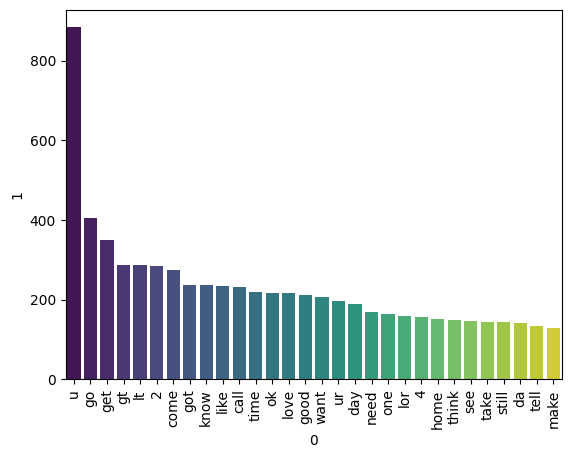

In [123]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [124]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text'].apply(lambda x: " ".join(x))).toarray()

In [125]:
X.shape

(5169, 3000)

In [126]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [127]:
y = df['target'].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [129]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [130]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214


In [131]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [132]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [133]:
# tfidf --> mnb
# because precision matters more than accuracy here, because of skewed dataset

In [134]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))